# Exploring the Weather in Athens


The purpose of this assignment is to gain insight about the weather in Athens and the impact of climate change through the examination of data over a period of more than 50 years.

---
> Natalia Katsiapi, 810040 <br/>
> Department of Management Science and Technology <br/>
> Athens University of Economics and Business <br/>
> t8180040@aueb.gr

## Obtain the Data

The data for the Hellinikon weather station can be obtained from National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:GR000016716/detail) in CSV format.

They are ready to be loaded with Pandas.

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv("athens_data.csv", parse_dates=["DATE"])
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.00,NaN,NaN,65.0,50.0
1,GR000016716,1955-01-02,0.08,NaN,NaN,58.0,45.0
2,GR000016716,1955-01-03,0.00,NaN,NaN,60.0,49.0
3,GR000016716,1955-01-04,0.00,NaN,NaN,66.0,45.0
4,GR000016716,1955-01-05,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,2020-12-28,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,2020-12-29,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,2020-12-30,0.00,NaN,62.0,68.0,59.0


In [304]:
data["PRCP"] = data["PRCP"] * 2.54 * 10
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.000,NaN,NaN,65.0,50.0
1,GR000016716,1955-01-02,2.032,NaN,NaN,58.0,45.0
2,GR000016716,1955-01-03,0.000,NaN,NaN,60.0,49.0
3,GR000016716,1955-01-04,0.000,NaN,NaN,66.0,45.0
4,GR000016716,1955-01-05,0.000,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.000,NaN,62.0,NaN,NaN
23247,GR000016716,2020-12-28,6.604,NaN,59.0,65.0,53.0
23248,GR000016716,2020-12-29,0.000,NaN,61.0,68.0,54.0
23249,GR000016716,2020-12-30,0.000,NaN,62.0,68.0,59.0


In [305]:
def fahrenheit_to_celsius(t):
    return 5/9 * (t - 32)

data[["TAVG", "TMAX", "TMIN"]] = data[["TAVG", "TMAX", "TMIN"]].apply(fahrenheit_to_celsius)
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.000,NaN,NaN,18.333333,10.000000
1,GR000016716,1955-01-02,2.032,NaN,NaN,14.444444,7.222222
2,GR000016716,1955-01-03,0.000,NaN,NaN,15.555556,9.444444
3,GR000016716,1955-01-04,0.000,NaN,NaN,18.888889,7.222222
4,GR000016716,1955-01-05,0.000,NaN,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,NaN,NaN
23247,GR000016716,2020-12-28,6.604,NaN,15.000000,18.333333,11.666667
23248,GR000016716,2020-12-29,0.000,NaN,16.111111,20.000000,12.222222
23249,GR000016716,2020-12-30,0.000,NaN,16.666667,20.000000,15.000000


As we notice, a significant number of average temperatures is missing till 1974.

In [306]:
data.DATE[data.TAVG.isna()]

0       1955-01-01
1       1955-01-02
2       1955-01-03
3       1955-01-04
4       1955-01-05
           ...    
7166    1974-08-15
7167    1974-08-16
7455    1975-05-31
7958    1976-10-15
16080   1999-01-10
Name: DATE, Length: 2311, dtype: datetime64[ns]

In [307]:
before_2010 = data.DATE.dt.year < 2010
# Cannot do inplace=True
data.loc[before_2010, 'TAVG'] = data.loc[before_2010, 'TAVG'].fillna(value=(data.TMAX + data.TMIN) / 2)

In [308]:
data[data.TAVG.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
798,GR000016716,1957-03-09,0.254,NaN,NaN,16.666667,NaN


We still have a date with null values, since TMIN is NaN. What we can do is use the average of the previous and the next year.

In [309]:
data.TAVG.iloc[798] = (data.iloc[797].TAVG + data.iloc[799].TAVG) / 2
data.iloc[797:800]

C:\Users\kat26\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
797,GR000016716,1957-03-08,0.508,NaN,13.611111,17.222222,10.000000
798,GR000016716,1957-03-09,0.254,NaN,11.805556,16.666667,NaN
799,GR000016716,1957-03-10,0.000,NaN,10.000000,12.222222,7.777778


Now we will examine TMAX and TMIN columns.

In [310]:
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
798,GR000016716,1957-03-09,0.254,NaN,11.805556,16.666667,NaN
4119,GR000016716,1966-04-12,0.000,NaN,17.777778,22.222222,NaN
4335,GR000016716,1966-11-14,0.000,NaN,17.222222,19.444444,NaN
9102,GR000016716,1979-12-03,1.016,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04,0.000,NaN,8.333333,NaN,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13,8.890,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.000,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,NaN,NaN


We will calculate them, based on the previous logic, using TAVG.

In [311]:
data.loc[before_2010, 'TMAX'] = data.loc[before_2010, 'TMAX'].fillna(value=2 * data.TAVG - data.TMIN)
data.loc[before_2010, 'TMIN'] = data.loc[before_2010, 'TMIN'].fillna(value=2 * data.TAVG - data.TMAX)
data[data.TMAX.isna() | data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
9102,GR000016716,1979-12-03,1.016,NaN,15.000000,NaN,NaN
18266,GR000016716,2005-01-04,0.000,NaN,8.333333,NaN,NaN
18289,GR000016716,2005-01-27,NaN,NaN,12.777778,NaN,NaN
18293,GR000016716,2005-01-31,11.176,NaN,5.555556,NaN,NaN
18296,GR000016716,2005-02-03,NaN,NaN,3.888889,NaN,NaN
...,...,...,...,...,...,...,...
23229,GR000016716,2020-12-10,NaN,NaN,14.444444,NaN,NaN
23232,GR000016716,2020-12-13,8.890,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.000,NaN,12.222222,NaN,11.111111
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,NaN,NaN


There are still missing values, however for the time being they do not have an impact on our analysis. The same goes for percipitation. For the sake of completeness we will fill them with an average of values before 2010.

In [312]:
data.loc[before_2010, 'TMIN'] = data.loc[before_2010, 'TMIN'].fillna(value=data.loc[before_2010, 'TMIN'].mean())
data.loc[before_2010, 'TMAX'] = data.loc[before_2010, 'TMAX'].fillna(value=data.loc[before_2010, 'TMAX'].mean())
# data.loc[before_2010, 'PRCP'] = data.loc[before_2010, 'PRCP'].fillna(value=data.loc[before_2010, 'PRCP'].mean())
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
1911,GR000016716,1960-03-26,NaN,NaN,12.222222,16.111111,8.333333
1974,GR000016716,1960-05-28,NaN,NaN,20.555556,23.888889,17.222222
2093,GR000016716,1960-09-24,NaN,NaN,20.277778,23.333333,17.222222
2210,GR000016716,1961-01-19,NaN,NaN,2.222222,3.333333,0.555556
2291,GR000016716,1961-04-10,NaN,NaN,19.444444,23.333333,15.000000
...,...,...,...,...,...,...,...
23232,GR000016716,2020-12-13,8.89,NaN,14.444444,NaN,12.222222
23233,GR000016716,2020-12-14,0.00,NaN,12.222222,NaN,11.111111
23244,GR000016716,2020-12-25,NaN,NaN,15.000000,19.444444,12.777778
23246,GR000016716,2020-12-27,0.00,NaN,16.666667,NaN,NaN


The same steps will be repeated for the 2020 dates.

In [313]:
dates_2020 = data.DATE.dt.year == 2020
data.loc[dates_2020 & data.TMIN.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
22885,GR000016716,2020-01-01,0.000,NaN,8.333333,11.666667,NaN
22889,GR000016716,2020-01-05,0.000,NaN,9.444444,13.333333,NaN
22890,GR000016716,2020-01-06,6.604,NaN,5.555556,7.222222,NaN
22901,GR000016716,2020-01-17,0.000,NaN,10.000000,11.666667,NaN
22905,GR000016716,2020-01-21,0.000,NaN,7.777778,9.444444,NaN
22911,GR000016716,2020-01-27,0.000,NaN,13.333333,17.777778,NaN
22914,GR000016716,2020-01-30,0.000,NaN,14.444444,18.333333,NaN
22920,GR000016716,2020-02-05,0.000,NaN,12.222222,16.111111,NaN
22923,GR000016716,2020-02-08,0.000,NaN,5.555556,8.888889,NaN
22930,GR000016716,2020-02-15,1.016,NaN,12.222222,NaN,NaN


There are also a couple of missing values for ```TMIN``` and ```TMAX```. They don't interfere with iur analysis so we will just replace the with te average.

In [314]:
data.loc[dates_2020, 'TMAX'] = data.loc[dates_2020, 'TMAX'].fillna(value=data.loc[dates_2020, 'TMAX'].mean())
data.loc[dates_2020, 'TMIN'] = data.loc[dates_2020, 'TMIN'].fillna(value=data.loc[dates_2020, 'TMIN'].mean())
# data.loc[dates_2020, 'PRCP'] = data.loc[dates_2020, 'PRCP'].fillna(value=data.loc[dates_2020, 'PRCP'].mean())
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
1911,GR000016716,1960-03-26,NaN,NaN,12.222222,16.111111,8.333333
1974,GR000016716,1960-05-28,NaN,NaN,20.555556,23.888889,17.222222
2093,GR000016716,1960-09-24,NaN,NaN,20.277778,23.333333,17.222222
2210,GR000016716,1961-01-19,NaN,NaN,2.222222,3.333333,0.555556
2291,GR000016716,1961-04-10,NaN,NaN,19.444444,23.333333,15.000000
...,...,...,...,...,...,...,...
23222,GR000016716,2020-12-03,NaN,NaN,13.888889,17.222222,15.536458
23226,GR000016716,2020-12-07,NaN,NaN,15.555556,18.333333,15.536458
23229,GR000016716,2020-12-10,NaN,NaN,14.444444,24.008547,15.536458
23231,GR000016716,2020-12-12,NaN,NaN,15.000000,18.333333,12.222222


Now we will move on to the dates starting from 2010, for which we have a second dataset. Dataset's headings were found [here](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748). We will keep only the needed columns.

In [315]:
data.DATE.isna
# data.loc[(data.DATE >= "2010-01-02") & (data.DATE <= "2019-12-31"), "DATE"]

<bound method Series.isna of 0       1955-01-01
1       1955-01-02
2       1955-01-03
3       1955-01-04
4       1955-01-05
           ...    
23246   2020-12-27
23247   2020-12-28
23248   2020-12-29
23249   2020-12-30
23250   2020-12-31
Name: DATE, Length: 23251, dtype: datetime64[ns]>

In [316]:
recent_data = pd.read_csv("athens.csv")
recent_data.columns = range(14)
recent_data = recent_data[[0, 1, 2, 3, 6]]
recent_data.columns = ["date", "avgt", "maxt", "mint", "prcp"]
recent_data.date = pd.to_datetime(recent_data.date)


If we see the data types, columns are not numeric, and can neither be converted due to line 513.

In [317]:
recent_data.loc[513]

date    2011-05-30 00:00:00
avgt                    ---
maxt                    ---
mint                    ---
prcp                     40
Name: 513, dtype: object

So, we will delete it.

In [318]:
recent_data.drop(recent_data[recent_data.avgt == "---"].index, inplace=True)


In [319]:
recent_data[["avgt", "maxt", "mint", "prcp"]] = recent_data[["avgt", "maxt", "mint", "prcp"]].apply(pd.to_numeric, errors='coerce', axis=1)


It would be easy to replace the part which is greater than 2010-01-02 with the recent dataset. However, as we see, they are not of the same shape.

In [320]:
recent_data.loc[recent_data['date'] >= "2010-01-02", 'date']

0      2010-01-02
1      2010-01-03
2      2010-01-04
3      2010-01-05
4      2010-01-06
          ...    
3646   2019-12-27
3647   2019-12-28
3648   2019-12-29
3649   2019-12-30
3650   2019-12-31
Name: date, Length: 3648, dtype: datetime64[ns]

Obviously some dates from the original dataset are missing. In order to be able to use the information from the aother dataset, it will be easier to join them with ```merge```. We will select outer join, so that we will be able to add the missing dates.

In [321]:
data = pd.merge(data, recent_data, how="outer", left_on='DATE', right_on='date')
data.tail(10)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
24093,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-10,26.5,26.6,26.4,47.0
24094,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-20,26.8,26.9,26.7,34.0
24095,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-21,24.0,24.1,23.9,32.0
24096,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-23,22.4,22.5,22.3,38.0
24097,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-09-27,22.1,22.2,22.0,55.0
24098,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-02,18.7,18.8,18.6,50.0
24099,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-08,17.8,17.9,17.7,34.0
24100,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-15,20.4,20.5,20.3,33.0
24101,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2017-10-27,17.8,17.9,17.7,38.0
24102,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2018-09-17,26.3,26.3,26.2,38.0


In [322]:
data.DATE.fillna(value=data.date, inplace=True)
# data.PRCP.fillna(value=data.prcp, inplace=True)
data.TAVG.fillna(value=data.avgt, inplace=True)
data.TMAX.fillna(value=data.maxt, inplace=True)
data.TMIN.fillna(value=data.mint, inplace=True)
data[data.TMAX.isna() | data.TMIN.isna() | data.PRCP.isna()]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
1911,GR000016716,1960-03-26,NaN,NaN,12.222222,16.111111,8.333333,NaT,NaN,NaN,NaN,NaN
1974,GR000016716,1960-05-28,NaN,NaN,20.555556,23.888889,17.222222,NaT,NaN,NaN,NaN,NaN
2093,GR000016716,1960-09-24,NaN,NaN,20.277778,23.333333,17.222222,NaT,NaN,NaN,NaN,NaN
2210,GR000016716,1961-01-19,NaN,NaN,2.222222,3.333333,0.555556,NaT,NaN,NaN,NaN,NaN
2291,GR000016716,1961-04-10,NaN,NaN,19.444444,23.333333,15.000000,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24098,NaN,2017-10-02,NaN,NaN,18.700000,18.800000,18.600000,2017-10-02,18.7,18.8,18.6,50.0
24099,NaN,2017-10-08,NaN,NaN,17.800000,17.900000,17.700000,2017-10-08,17.8,17.9,17.7,34.0
24100,NaN,2017-10-15,NaN,NaN,20.400000,20.500000,20.300000,2017-10-15,20.4,20.5,20.3,33.0
24101,NaN,2017-10-27,NaN,NaN,17.800000,17.900000,17.700000,2017-10-27,17.8,17.9,17.7,38.0


We still have 01-01-2010, where percipitation and minimum temperature is missing. We can calculate it based on the previous and the next values.

In [323]:
data.PRCP.iloc[20086] = (data.iloc[20085].PRCP + data.iloc[20087].PRCP) / 2
data.TMIN.iloc[20086] = (data.iloc[20085].TMIN + data.iloc[20087].TMIN) / 2
data.iloc[20085:20088]

C:\Users\kat26\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
20085,GR000016716,2009-12-31,0.0,NaN,14.444444,19.444444,9.444444,NaT,NaN,NaN,NaN,NaN
20086,GR000016716,2010-01-01,0.0,NaN,17.777778,21.666667,11.666667,NaT,NaN,NaN,NaN,NaN
20087,GR000016716,2010-01-02,0.0,NaN,16.111111,17.777778,13.888889,2010-01-02,15.6,15.7,15.5,45.0


We will drop the unnecessary columns and have some statistics to see if generally we can continue with the analysis, after we sort them by date (in order to read them more easily).


In [324]:
data = data.sort_values(by="DATE")
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,date,avgt,maxt,mint,prcp
0,GR000016716,1955-01-01,0.000,NaN,14.166667,18.333333,10.000000,NaT,NaN,NaN,NaN,NaN
1,GR000016716,1955-01-02,2.032,NaN,10.833333,14.444444,7.222222,NaT,NaN,NaN,NaN,NaN
2,GR000016716,1955-01-03,0.000,NaN,12.500000,15.555556,9.444444,NaT,NaN,NaN,NaN,NaN
3,GR000016716,1955-01-04,0.000,NaN,13.055556,18.888889,7.222222,NaT,NaN,NaN,NaN,NaN
4,GR000016716,1955-01-05,0.000,NaN,13.055556,17.777778,8.333333,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,24.008547,15.536458,NaT,NaN,NaN,NaN,NaN
23247,GR000016716,2020-12-28,6.604,NaN,15.000000,18.333333,11.666667,NaT,NaN,NaN,NaN,NaN
23248,GR000016716,2020-12-29,0.000,NaN,16.111111,20.000000,12.222222,NaT,NaN,NaN,NaN,NaN
23249,GR000016716,2020-12-30,0.000,NaN,16.666667,20.000000,15.000000,NaT,NaN,NaN,NaN,NaN


In [325]:
data.drop(columns=['date', 'avgt', 'maxt', 'mint', "prcp"], inplace=True)
data
data.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,22774.000000,30.000000,24103.000000,24103.000000,24103.000000
mean,1.010847,6.006667,18.362447,22.178008,14.712090
std,4.633534,13.950922,6.905348,7.403353,6.581722
min,0.000000,0.400000,-2.222222,0.900000,-4.444444
25%,0.000000,0.400000,12.777778,16.666667,9.444444
50%,0.000000,0.800000,17.777778,21.666667,14.444444
75%,0.000000,1.600000,24.444444,28.333333,20.000000
max,141.986000,48.800000,35.000000,42.222222,34.700000


## Q2: Deviation of Summer Temperatures


We will start by obtaining the data from 1974 and afterwards.

In [326]:
summer_1974_1999 = data.loc[(data.DATE.dt.year >= 1974) & (data.DATE.dt.year <= 1999) & (data.DATE.dt.month).between(6,8)]
summer_1974_1999

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
7091,GR000016716,1974-06-01,0.000,NaN,22.777778,26.666667,17.222222
7092,GR000016716,1974-06-02,0.000,NaN,23.333333,27.777778,20.000000
7093,GR000016716,1974-06-03,0.254,NaN,22.222222,26.666667,20.000000
7094,GR000016716,1974-06-04,2.540,NaN,21.111111,24.444444,18.333333
7095,GR000016716,1974-06-05,0.000,NaN,23.888889,31.666667,18.333333
...,...,...,...,...,...,...,...
16309,GR000016716,1999-08-27,0.000,NaN,24.444444,29.444444,21.111111
16310,GR000016716,1999-08-28,0.000,NaN,24.444444,29.444444,20.555556
16311,GR000016716,1999-08-29,0.000,NaN,25.555556,30.000000,20.000000
16312,GR000016716,1999-08-30,0.000,NaN,26.111111,31.666667,21.111111


Then, we will need to group by year to calculate the average yearly temperature.

In [327]:
summer = data[data.DATE.dt.month.between(6,8)]
summer.tail(70)

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
23059,GR000016716,2020-06-23,8.382,NaN,22.777778,28.333333,18.333333
23060,GR000016716,2020-06-24,0.000,NaN,25.000000,28.333333,20.555556
23061,GR000016716,2020-06-25,0.000,NaN,26.111111,30.555556,20.555556
23062,GR000016716,2020-06-26,0.000,NaN,26.666667,30.555556,22.222222
23063,GR000016716,2020-06-27,0.000,NaN,27.222222,31.111111,23.888889
...,...,...,...,...,...,...,...
23124,GR000016716,2020-08-27,0.000,NaN,28.333333,34.444444,23.333333
23125,GR000016716,2020-08-28,0.000,NaN,29.444444,35.555556,22.222222
23126,GR000016716,2020-08-29,0.000,NaN,29.444444,35.555556,22.777778
23127,GR000016716,2020-08-30,0.000,NaN,27.777778,34.444444,22.222222


In [328]:
summer_grouped = summer.groupby(data.DATE.dt.year)

In [329]:
summer_mean = summer_1974_1999.TAVG.mean()
print(summer_mean)
deviations = []
for n, s in summer_grouped:
    deviation = s.TAVG.mean() - summer_mean
    print(n, deviation)
    deviations.append(deviation)
summer_devs = pd.DataFrame({
    "year": summer_grouped.groups.keys(),
    "dev": deviations
})
summer_devs.head(30)

26.226193794128612
1955 -0.2932227796358653
1956 0.923564659977675
1957 1.150013935339988
1958 0.8148690078037539
1959 0.1687337421032673
1960 0.3076226309921566
1961 0.39216369379409244
1962 1.2858835005573717
1963 1.3221153846153477
1964 0.0962699739873294
1965 0.28346804162017847
1966 0.7907144184317652
1967 0.4948206986250092
1968 -0.5317493496841657
1969 -0.8759522482348991
1970 -0.06979282794504371
1971 -0.23887495354890476
1972 -0.32341601635082995
1973 -0.13319862504647872
1974 0.22006224451874346
1975 -0.2962421033073497
1976 -1.3892372723894866
1977 0.34385451505012554
1978 -0.48344017094020586
1979 -0.09092809364551258
1980 -0.6585609438870677
1981 -0.6827155332590422
1982 -1.1960005574136297
1983 -1.8723290598290951
1984 -1.902522296544074
1985 -0.2418942772203927
1986 0.6216322928279006
1987 -0.326435340022325
1988 0.6940960609438456
1989 -0.11508268301750135
1990 0.39216369379409954
1991 -0.14527591973248732
1992 -0.2056623931624202
1993 0.5491685247119626
1994 0.93564195

,year,dev
0,1955,-0.293223
1,1956,0.923565
2,1957,1.150014
3,1958,0.814869
4,1959,0.168734
5,1960,0.307623
6,1961,0.392164
7,1962,1.285884
8,1963,1.322115
9,1964,0.096270


In [330]:
summer_devs['rolling_dev'] = summer_devs.dev.rolling(10, min_periods=10).mean()
summer_devs

,year,dev,rolling_dev
0,1955,-0.293223,NaN
1,1956,0.923565,NaN
2,1957,1.150014,NaN
3,1958,0.814869,NaN
4,1959,0.168734,NaN
...,...,...,...
61,2016,1.950135,1.953814
62,2017,1.853154,1.938794
63,2018,1.183226,1.862707
64,2019,1.787091,1.926717


In [331]:
# summer_devs.loc[summer_devs.year <= 1964, 'rolling_dev'] = summer_devs.dev.rolling(2).mean()
for i in range(10):
    summer_devs.loc[i, 'rolling_dev'] = summer_devs.loc[0:i, "dev"].mean()
summer_devs

,year,dev,rolling_dev
0,1955,-0.293223,-0.293223
1,1956,0.923565,0.315171
2,1957,1.150014,0.593452
3,1958,0.814869,0.648806
4,1959,0.168734,0.552792
...,...,...,...
61,2016,1.950135,1.953814
62,2017,1.853154,1.938794
63,2018,1.183226,1.862707
64,2019,1.787091,1.926717


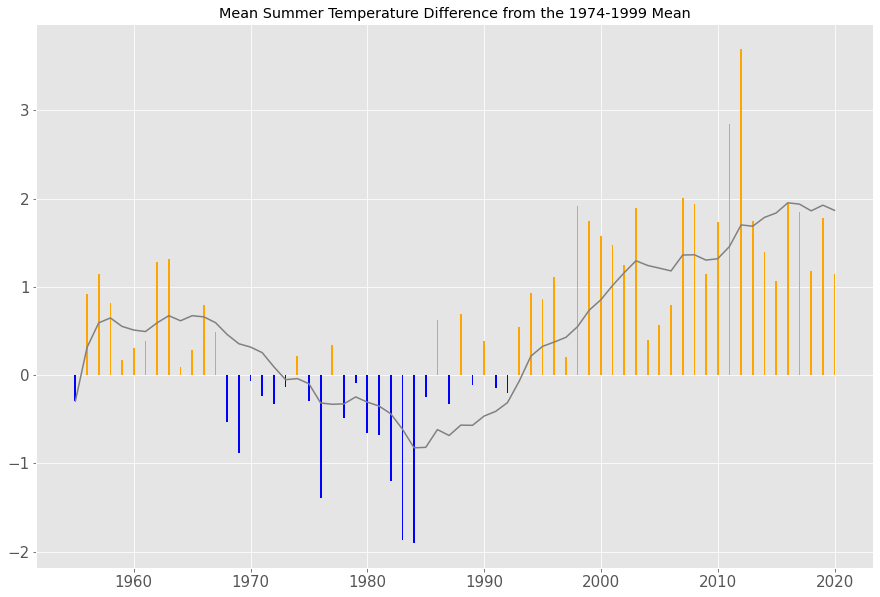

In [332]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='both', which='major', labelsize=15)
clrs = ['blue' if (dev < 0) else 'orange' for dev in summer_devs.dev ]
ax.bar(width=0.15, x="year", height="dev", align='center', data=summer_devs, color=clrs, edgecolor='none')
ax.plot("year", "rolling_dev", data=summer_devs, color="grey")
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.show()

## Q3: Evolution of Daily Temperatures

In [333]:
data['YEAR'] = data.DATE.dt.year
data['DAY'] = data.DATE.dt.dayofyear
data

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY
0,GR000016716,1955-01-01,0.000,NaN,14.166667,18.333333,10.000000,1955,1
1,GR000016716,1955-01-02,2.032,NaN,10.833333,14.444444,7.222222,1955,2
2,GR000016716,1955-01-03,0.000,NaN,12.500000,15.555556,9.444444,1955,3
3,GR000016716,1955-01-04,0.000,NaN,13.055556,18.888889,7.222222,1955,4
4,GR000016716,1955-01-05,0.000,NaN,13.055556,17.777778,8.333333,1955,5
...,...,...,...,...,...,...,...,...,...
23246,GR000016716,2020-12-27,0.000,NaN,16.666667,24.008547,15.536458,2020,362
23247,GR000016716,2020-12-28,6.604,NaN,15.000000,18.333333,11.666667,2020,363
23248,GR000016716,2020-12-29,0.000,NaN,16.111111,20.000000,12.222222,2020,364
23249,GR000016716,2020-12-30,0.000,NaN,16.666667,20.000000,15.000000,2020,365


In [334]:
mean_per_month_year = data.groupby("YEAR").mean()
mean_per_month_year

,PRCP,SNWD,TAVG,TMAX,TMIN,DAY
YEAR,,,,,,
1955,1.499644,NaN,18.779300,23.164384,14.394216,183.0
1956,0.768940,NaN,18.153461,22.577413,13.729508,183.5
1957,0.828805,NaN,18.390791,22.622527,14.226027,183.0
1958,0.959633,NaN,18.694064,22.916286,14.800609,183.0
1959,0.585940,NaN,17.919330,22.057839,13.780822,183.0
...,...,...,...,...,...,...
2016,0.726364,0.600000,19.375440,20.898998,15.933698,183.5
2017,0.914712,0.400000,19.175221,20.559452,15.755799,183.0
2018,1.056329,0.400000,19.504323,23.163044,16.088189,183.0


In [335]:
data['30day_rolling_avg'] = data.TAVG.rolling(30).mean()
data.head()

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY,30day_rolling_avg
0,GR000016716,1955-01-01,0.000,NaN,14.166667,18.333333,10.000000,1955,1,NaN
1,GR000016716,1955-01-02,2.032,NaN,10.833333,14.444444,7.222222,1955,2,NaN
2,GR000016716,1955-01-03,0.000,NaN,12.500000,15.555556,9.444444,1955,3,NaN
3,GR000016716,1955-01-04,0.000,NaN,13.055556,18.888889,7.222222,1955,4,NaN
4,GR000016716,1955-01-05,0.000,NaN,13.055556,17.777778,8.333333,1955,5,NaN


In [336]:
grouped_by_day = data[(data.YEAR >= 1974) & (data.YEAR <= 1999)].groupby("DAY")
average_per_day = []
for k,v in grouped_by_day:
    average_per_day.append(v.TAVG.mean())
avgs_for_1974_1999 = pd.DataFrame()
avgs_for_1974_1999['avg'] = average_per_day
avgs_for_1974_1999['day'] = grouped_by_day.groups.keys()
avgs_for_1974_1999

,avg,day
0,10.363248,1
1,10.705128,2
2,10.213675,3
3,9.594017,4
4,9.957265,5
...,...,...
361,10.277778,362
362,10.662393,363
363,11.025641,364
364,11.111111,365


In [337]:
avgs_for_1974_1999['rolled_avg'] = avgs_for_1974_1999.avg.rolling(30, min_periods=1).mean()
avgs_for_1974_1999

,avg,day,rolled_avg
0,10.363248,1,10.363248
1,10.705128,2,10.534188
2,10.213675,3,10.427350
3,9.594017,4,10.219017
4,9.957265,5,10.166667
...,...,...,...
361,10.277778,362,11.560541
362,10.662393,363,11.481481
363,11.025641,364,11.433761
364,11.111111,365,11.386040


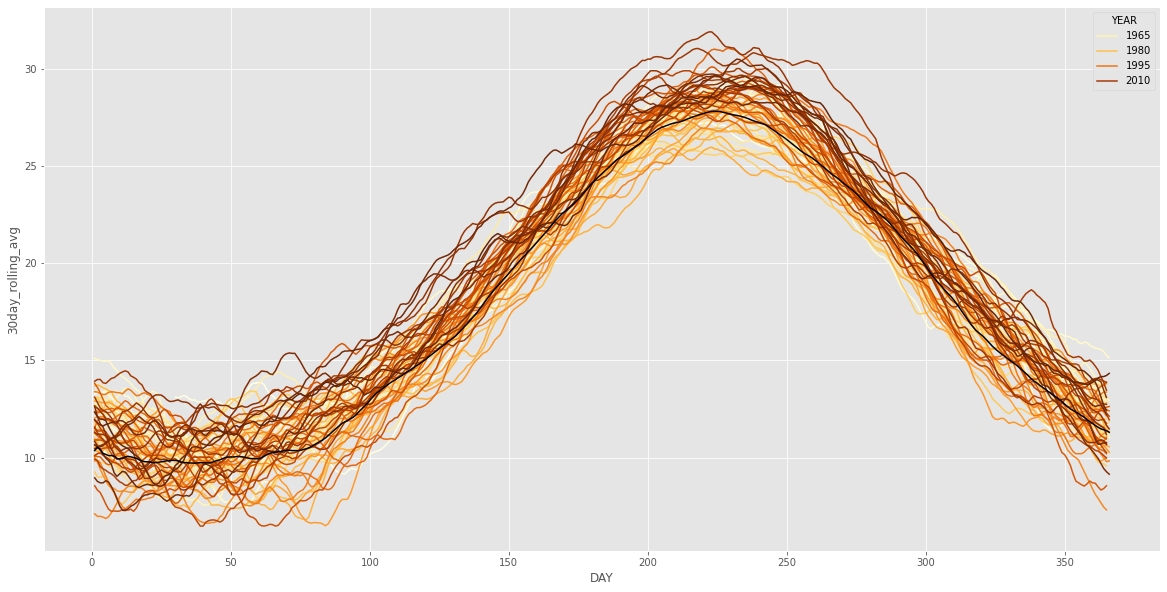

In [338]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.lineplot(x="DAY", y="30day_rolling_avg", data=data, hue="YEAR", palette="YlOrBr")
ax.plot("day", "rolled_avg", data=avgs_for_1974_1999, color="black")
plt.show()

## Q4: Extreme Temperature Events

In [339]:
perc_of_extremes = {}
grouped_by_year = data.groupby(data.YEAR)
perc_of_extremes = dict.fromkeys(grouped_by_year.groups.keys())
for n, v in grouped_by_year:
    v.reset_index(inplace=True)
    perc_of_extremes[n] = v.loc[v.TAVG - avgs_for_1974_1999.avg > 0.1 * avgs_for_1974_1999.avg].TAVG.count() / v.shape[0]
perc_of_extremes

{1955: 0.35342465753424657,
 1956: 0.32786885245901637,
 1957: 0.3150684931506849,
 1958: 0.3726027397260274,
 1959: 0.2547945205479452,
 1960: 0.40437158469945356,
 1961: 0.3698630136986301,
 1962: 0.42191780821917807,
 1963: 0.4,
 1964: 0.22950819672131148,
 1965: 0.3095890410958904,
 1966: 0.4383561643835616,
 1967: 0.3041095890410959,
 1968: 0.30601092896174864,
 1969: 0.2602739726027397,
 1970: 0.25753424657534246,
 1971: 0.20821917808219179,
 1972: 0.2103825136612022,
 1973: 0.2602739726027397,
 1974: 0.18082191780821918,
 1975: 0.2684931506849315,
 1976: 0.21311475409836064,
 1977: 0.3232876712328767,
 1978: 0.21095890410958903,
 1979: 0.30684931506849317,
 1980: 0.18032786885245902,
 1981: 0.25753424657534246,
 1982: 0.13972602739726028,
 1983: 0.13424657534246576,
 1984: 0.17759562841530055,
 1985: 0.24383561643835616,
 1986: 0.28493150684931506,
 1987: 0.17534246575342466,
 1988: 0.16120218579234974,
 1989: 0.2602739726027397,
 1990: 0.3178082191780822,
 1991: 0.1835616438356

We will calculate the average number of extreme events for the years 1974-1999.

In [340]:
values = [perc_of_extremes[k] for k in range(1974, 1999 + 1)]
perc_of_extremes_1974_1999 = sum(values) / len(values)
perc_of_extremes_1974_1999

0.2492949149809693

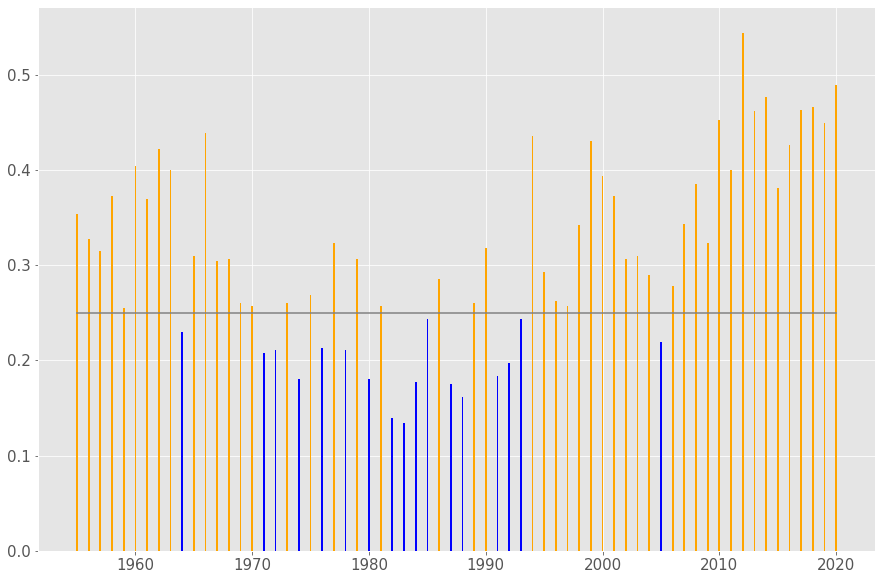

In [341]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='both', which='major', labelsize=15)
clrs = ['blue' if (perc < perc_of_extremes_1974_1999) else 'orange' for perc in perc_of_extremes.values()]
ax.bar(width=0.15, x=list(perc_of_extremes.keys()), height=perc_of_extremes.values(), align='center', color=clrs, edgecolor='none')
ax.plot(perc_of_extremes.keys(), [perc_of_extremes_1974_1999] * (2020 - 1955 + 1), color="grey")
plt.show()

## Q5: Precipitation

In [342]:
data.loc[data.YEAR == 2016]

,STATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,YEAR,DAY,30day_rolling_avg
21449,GR000016716,2016-01-01,0.000,NaN,3.888889,7.222222,4.200000,2016,1,10.833333
21450,GR000016716,2016-01-02,0.508,NaN,7.777778,10.000000,1.111111,2016,2,10.611111
21451,GR000016716,2016-01-03,NaN,NaN,11.666667,11.300000,6.111111,2016,3,10.555556
21452,GR000016716,2016-01-04,0.000,NaN,13.333333,16.666667,8.888889,2016,4,10.611111
21453,GR000016716,2016-01-05,NaN,NaN,17.222222,21.666667,11.111111,2016,5,10.777778
...,...,...,...,...,...,...,...,...,...,...
21809,GR000016716,2016-12-27,0.254,NaN,10.555556,12.200000,7.777778,2016,362,9.962963
21810,GR000016716,2016-12-28,8.890,NaN,7.222222,7.500000,5.555556,2016,363,9.703704
21811,GR000016716,2016-12-29,1.778,NaN,3.888889,4.600000,0.555556,2016,364,9.444444
21812,GR000016716,2016-12-30,0.000,NaN,3.333333,3.700000,3.600000,2016,365,9.277778


In [352]:
total_rain = data.loc[data.PRCP > 0].groupby(data.YEAR).sum().PRCP
num_of_rainy_days = data.loc[data.PRCP > 0].groupby(data.YEAR).count().PRCP
rain = pd.DataFrame({
                        "total_rain": total_rain,
                        "num_of_days": num_of_rainy_days,
                        "perc": total_rain / num_of_rainy_days
                    })
rain.reset_index(inplace=True)
rain['perc_rolled'] = rain.perc.rolling(10, min_periods=1).mean()
rain

,YEAR,total_rain,num_of_days,perc,perc_rolled
0,1955,547.370,67,8.169701,8.169701
1,1956,281.432,50,5.628640,6.899171
2,1957,302.514,66,4.583545,6.127296
3,1958,350.266,65,5.388708,5.942649
4,1959,213.868,57,3.752070,5.504533
...,...,...,...,...,...
61,2016,243.332,38,6.403474,6.036659
62,2017,298.196,45,6.626578,6.143447
63,2018,379.222,52,7.292731,6.327398
64,2019,570.230,58,9.831552,6.773933


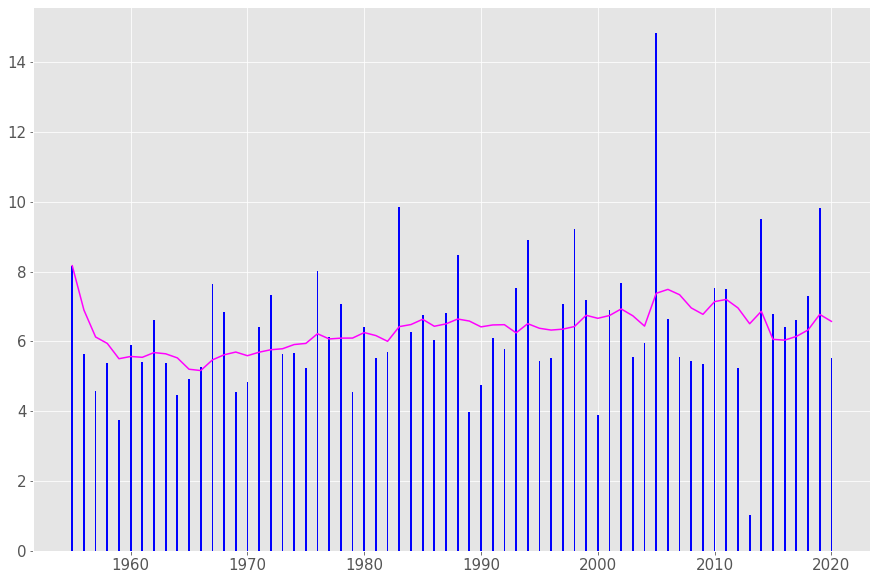

In [354]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis='both', which='major', labelsize=15)
clrs = ['blue']
ax.bar(width=0.15, x="YEAR", height="perc", data=rain, align='center', color=clrs, edgecolor='none')
ax.plot("YEAR", "perc_rolled", data=rain, color="magenta")
plt.show()